In [62]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import pandas as pd
import seaborn as sns

In [79]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [7]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
data.drop("customerID", axis = 1, inplace = True)

In [14]:
data.shape

(7043, 20)

In [11]:
for cols in data.columns:
    print(f"{cols} : {data[cols].dtype}")

gender : object
SeniorCitizen : int64
Partner : object
Dependents : object
tenure : int64
PhoneService : object
MultipleLines : object
InternetService : object
OnlineSecurity : object
OnlineBackup : object
DeviceProtection : object
TechSupport : object
StreamingTV : object
StreamingMovies : object
Contract : object
PaperlessBilling : object
PaymentMethod : object
MonthlyCharges : float64
TotalCharges : object
Churn : object


In [12]:
data[pd.to_numeric(data.TotalCharges, errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
data1 = data[data.TotalCharges != " "]
data1.shape

(7032, 20)

In [15]:
data1.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [16]:
data1["TotalCharges"] = pd.to_numeric(data1.TotalCharges)

C:\Users\DELL\AppData\Local\Temp\ipykernel_4512\271677091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["TotalCharges"] = pd.to_numeric(data1.TotalCharges)


In [18]:
for cols in data1.columns :
    print(f"{cols} : {data1[cols].unique()}")

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

In [ ]:
data1.replace('No phone service', 'No', inplace = True)
data1.replace('No internet service', 'No', inplace = True)

In [ ]:
cols_to_replace = ["Partner", "Dependents", "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
                   "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "Churn"]

for col in cols_to_replace :
    data1[col].replace({'Yes' : 1, 'No' : 0}, inplace = True)

data1["gender"].replace({'Female' : 0, 'Male' : 1}, inplace = True)

In [ ]:
cols_to_scale = ["TotalCharges", "MonthlyCharges", "tenure"]

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
for col in cols_to_scale :
    data1[cols_to_scale] = scaler.fit_transform(data1[cols_to_scale]) 

In [33]:
data1.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.000000,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,0.115423,0.001275,0
1,1,0,0,0,0.464789,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,0.385075,0.215867,0
2,1,0,0,0,0.014085,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,0.354229,0.010310,1


In [35]:
data2 = pd.get_dummies(data = data1, columns = ["InternetService", "Contract", "PaymentMethod"]).astype(int)

In [36]:
data2.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1


In [41]:
X = data2.drop('Churn', axis = 'columns')
y = data2['Churn']

In [42]:
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [44]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority')
X_sm, y_sm = smote.fit_resample(X,y)

y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.3, random_state = 42, stratify = y_sm)

In [48]:
X_train.shape

(7228, 26)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape = (26,), activation = 'relu'),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(10, activation = 'relu'),
    keras.layers.Dense(5, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [73]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8736 - loss: 0.2885
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8764 - loss: 0.2857
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8715 - loss: 0.2870
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8722 - loss: 0.2875
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8704 - loss: 0.2914
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8756 - loss: 0.2862
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8703 - loss: 0.2846
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8761 - loss: 0.2883
Epoch 9/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8769 - loss: 0.2745
Epoch 10/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8754 - loss: 0.2856
Epoch 11/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8761 - loss: 0.2802
Epoch 12/100
226/226 ━━━━━━━━━━━━━━━━━━━━

In [74]:
model.evaluate(X_test, y_test)

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7877 - loss: 0.7030


[0.7590169906616211, 0.7756617069244385]

In [75]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [76]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76      1549
           1       0.74      0.84      0.79      1549

    accuracy                           0.78      3098
   macro avg       0.78      0.78      0.77      3098
weighted avg       0.78      0.78      0.77      3098



Text(0.5, 1.0, 'Confusion Matrix')

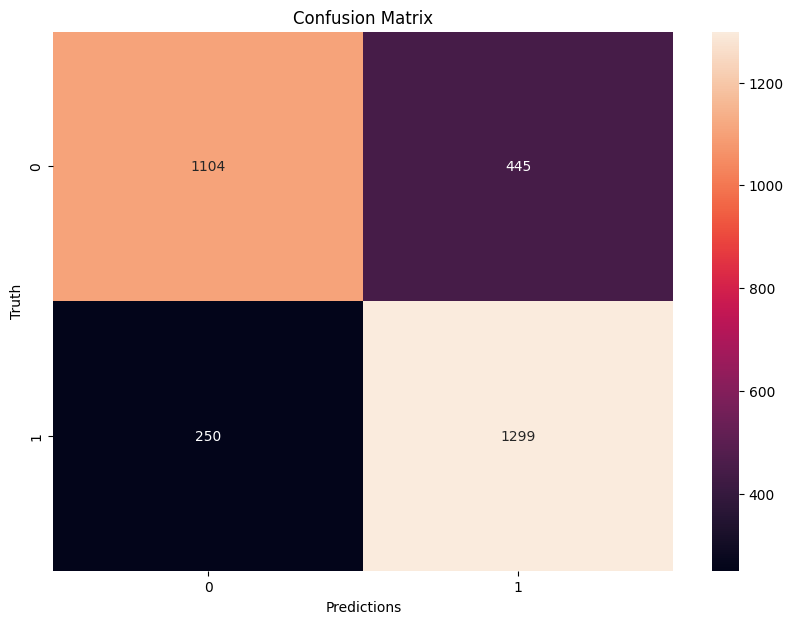

In [77]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel("Predictions")
plt.ylabel("Truth")
plt.title("Confusion Matrix")